# **Multi-class text classification problem**
- Names in 16 different languages
- Inputs are characters as one-hot encoded vectors
- We handrolled our own memory cell to feed words of different length without padding

#### Simplified and modified from the PyTorch tutorial available here:

https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html#creating-the-network

In [22]:
from io import open
import glob
import os

In [23]:
print(glob.glob('datasets/data/names/*.txt'))
# to read all the txt files in the names folder

['datasets/data/names\\Arabic.txt', 'datasets/data/names\\Chinese.txt', 'datasets/data/names\\Czech.txt', 'datasets/data/names\\Dutch.txt', 'datasets/data/names\\English.txt', 'datasets/data/names\\French.txt', 'datasets/data/names\\German.txt', 'datasets/data/names\\Greek.txt', 'datasets/data/names\\Irish.txt', 'datasets/data/names\\Italian.txt', 'datasets/data/names\\Japanese.txt', 'datasets/data/names\\Korean.txt', 'datasets/data/names\\Polish.txt', 'datasets/data/names\\Portuguese.txt', 'datasets/data/names\\Russian.txt', 'datasets/data/names\\Scottish.txt', 'datasets/data/names\\Spanish.txt', 'datasets/data/names\\Vietnamese.txt']


### Our model receives names in different languages character by character and classify them as the languages they belong to.
- 16 different languages

In [24]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'" # all the characters in our vocabulary
n_letters = len(all_letters)

all_letters # vocabulary of all letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [48]:
type(all_letters)

str

In [25]:
print("size of one-hot encoded feature-vector for each individual character:", n_letters)

size of one-hot encoded feature-vector for each individual character: 57


### For each character:
- 1 --> 1
- 56 --> 0

#### Build the `language_names` dictionary, a list of names per language

In [26]:
language_names = {}

all_languages = []

#### Read a file and split into lines

Turn a Unicode string to plain ASCII (may alter the meaning of words)
https://stackoverflow.com/questions/517923/what-is-the-best-way-to-remove-accents-in-a-python-unicode-string/518232#518232

### Define a function to convert unicode characters to ascii
- É --> E

In [27]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters # all_letters is of type string
    )

In [28]:
print(unicodeToAscii('Émile'))

Emile


In [29]:
print(unicodeToAscii('Ibáñez'))

Ibanez


In [30]:
def findFiles(path): # read all the files from a certain path
    return glob.glob(path)

### Now we want to map all the words to their corresponding language

In [31]:
for filename in findFiles('datasets/data/names/*.txt'):
    
    language = os.path.splitext(os.path.basename(filename))
    print(language)

('Arabic', '.txt')
('Chinese', '.txt')
('Czech', '.txt')
('Dutch', '.txt')
('English', '.txt')
('French', '.txt')
('German', '.txt')
('Greek', '.txt')
('Irish', '.txt')
('Italian', '.txt')
('Japanese', '.txt')
('Korean', '.txt')
('Polish', '.txt')
('Portuguese', '.txt')
('Russian', '.txt')
('Scottish', '.txt')
('Spanish', '.txt')
('Vietnamese', '.txt')


In [32]:
total_names = 0

for filename in findFiles('datasets/data/names/*.txt'):
    
    language = os.path.splitext(os.path.basename(filename))[0] # exclude .txt from file names
    
    all_languages.append(language) # append all language names to a list
    
    # for each .txt file: read all the names in each file seperated by next line and strip the spaces. 
    # read_name is a list of all names
    read_names = open(filename, encoding='utf-8').read().strip().split('\n') 
    
    # convert each name from unicode to ascii
    # names is a list of all names in ascii
    names = [unicodeToAscii(line) for line in read_names]
    
    # in this dictioanry, each key is a langauge and each value is a list of names in that language 
    language_names[language] = names
    
    # total number of names in all languages
    total_names += len(names)

#### There are 18 languages to which a name can be classified into

In [33]:
all_languages

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [34]:
n_languages = len(all_languages)
n_languages

18

In [36]:
total_names

20074

Now we have language_names, a dictionary mapping each category (language) to a list of lines (names). 

In [37]:
print(language_names['Czech'][:5])

['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch']


#### Turning Names into Tensors

Represent each name in one-hot encoded form (1 for the position of the letter, 0 elsewhere)

To make a word we join a bunch of those into a 2D matrix <line_length x 1 x n_letters>.
That extra 1 dimension is because PyTorch assumes everything is in batches - we're just using a batch size of 1 here.

- The below function is the one-hot encoder of characters

In [41]:
import torch

In [52]:
def letterToTensor(letter):
    
    # for each character, we create a feature-vector of all zeros and length of all letters(57)
    tensor = torch.zeros(1, n_letters) 
    
    # now each character shape is [1,57]
    # all_letters is a string of all characters in ascii
    # all_letters.find(letter) gives the index of the letter
    tensor[0][all_letters.find(letter)] = 1 
    
    
    return tensor

In [56]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [53]:
all_letters.find('c')

2

In [54]:
print(letterToTensor('a'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [55]:
print(letterToTensor('Z'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0.]])


### The inputs to the network are names, one character at a time in tensor format  which each character is a one-hot encoded tensor itself.
- The below function is the one-hot encoder of names

In [57]:
def nameToTensor(name):
    
    # 3 dimension tensor 
    # if len(name) = 5, it means that we have 5 2-d tensors, each of size(1, n_letters )
    tensor = torch.zeros(len(name), 1, n_letters)
    
    # create one-hot encoded tensors for each letter in a given name and combines them to gether
    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1
    
    return tensor

In [59]:
mary_tensor = nameToTensor('Mary')

mary_tensor.size()
# 4 leters in 'Mary'
# each letter has the shpa of (1, 57)
# 1 is for the format that RNN expects

torch.Size([4, 1, 57])

In [60]:
mary_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

### Now let's define our own RNN
- This allows us to give inputs of different shape to the Model

In [68]:
import torch.nn as nn

class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        # input_size = n_letters = 57 (inputs are characters and not words)
        # hidden_size we define it
        # output_size is 16 for 18 languages
        
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        
        # i2h means input to hidden and makes up one memory cell in our network
        # gets the next hidden state from (current input and previous hidden state)
        # output is the next hidden state
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        
        # i2h means input to output
        # gets the next output state from (current input and previous hidden state)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
                                  
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        # we give (current input and previous hidden) as inputs to the model when we want to train it
        
        # concatanate current input with previous state to get a single vector
        combined = torch.cat((input, hidden), 1)
        
        # gives us the next hidden state of the RNN
        hidden = self.i2h(combined)
        
        # gives the next output of the RNN
        output = self.i2o(combined)
        output = self.softmax(output)
        
        return output, hidden

    def initHidden(self):
        # when we feed in the first character, hidden state is zero
        return torch.zeros(1, self.hidden_size)

In [69]:
n_letters

57

In [70]:
n_hidden = 256

rnn = RNN(input_size = n_letters, hidden_size = n_hidden, output_size = n_languages  )

### Manually testing the network 
- One character at a ime

In [72]:
# convert to oe-hot encoded form
inp = letterToTensor('C')

# initialize hidden state, no previous hidden state so all zeros
hidden = torch.zeros(1, n_hidden)

# hidden is the previous hidden state
# next_hidden is the next hidden state
output, next_hidden = rnn(inp, hidden)

print('output size =', output.size())
print('next_hidden size =', next_hidden.size())

output size = torch.Size([1, 18])
next_hidden size = torch.Size([1, 256])


we can see the output is a < 1 x n_categories >

In [74]:
inp = nameToTensor('Charron')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inp[0], hidden)

In [75]:
print(output)

tensor([[-2.9503, -2.9375, -2.8164, -2.9195, -2.8502, -2.9481, -2.9378, -2.8807,
         -2.9158, -2.8572, -2.9056, -2.8727, -2.8651, -2.8908, -2.9754, -2.8465,
         -2.9009, -2.7783]], grad_fn=<LogSoftmaxBackward>)


In [108]:
print(next_hidden)

tensor([[-0.0460,  0.0001,  0.0199,  0.0120, -0.0108,  0.0264, -0.0025,  0.0840,
          0.0578,  0.0481, -0.0841, -0.0279, -0.0607, -0.0228,  0.0506,  0.0262,
          0.0307,  0.0785,  0.0396,  0.0019,  0.0524,  0.0039, -0.0044, -0.0992,
          0.0384,  0.0863, -0.0095, -0.0299,  0.0898,  0.0107,  0.0447, -0.0552,
         -0.0270, -0.0288, -0.0802,  0.0136,  0.0089,  0.0488, -0.0442, -0.0615,
         -0.0090, -0.0308, -0.0509,  0.0606, -0.1017, -0.0037, -0.0155, -0.0220,
         -0.0805, -0.0056,  0.0604, -0.0678,  0.0770,  0.0403,  0.0572,  0.0000,
          0.0956,  0.0672,  0.0059, -0.0413, -0.0189, -0.0105,  0.0015, -0.1103,
         -0.0397, -0.0075, -0.0595, -0.0448, -0.0556, -0.0476,  0.0318, -0.0724,
         -0.0046, -0.0015, -0.0459,  0.0496,  0.0539,  0.0351, -0.0775, -0.0371,
          0.1074,  0.0910, -0.0803, -0.0086,  0.0618,  0.0257, -0.0180, -0.0290,
         -0.0665,  0.0225, -0.0192,  0.0066, -0.0031,  0.0217,  0.0353, -0.0436,
          0.0716, -0.0304, -

### Preparing for Training
- Define a function so that we can give a name to the model instead of characters

We  make a few helper functions  the first one is to interpret the output of the network, which we know to be a likelihood of each language. We can use Tensor.topk to get the index of the greatest value

In [78]:
# Take the ouptut from RNN and finds the class the output belongs to
def languageFromOutput(output):
    
    # finds the index of highest probability value from the ouput
    _, top_i = output.topk(1)
    print(top_i)
    
    # finds the index corresponding to the predicted language
    language_i = top_i[0].item()
    print(language_i)
    
    return all_languages[language_i], language_i

In [79]:
print(languageFromOutput(output))

tensor([[17]])
17
('Vietnamese', 17)


We will also want a quick way to get a training example (a name and its language)

In [89]:
import random

def randomTrainingExample():
    
    #find a random language
    random_language_index = random.randint(0, n_languages - 1)
    language = all_languages[random_language_index]
    
    # find all names for the randomly selected language
    random_language_names = language_names[language]
    
    # select one of these names at random
    name = random_language_names[random.randint(0, len(random_language_names) - 1)]
    
    # convert language and the name into a tensor format
    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
    name_tensor = nameToTensor(name) # one-hot encoding characters in the name
    
    return language, name, language_tensor, name_tensor

In [90]:
all_languages.index('Arabic')

0

In [101]:
for i in range(10):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    print('language =', language, ', name =', name)
    if i==9:
        print()
        print("last name and language:") 
        print(" language_tensor", language_tensor, "\n name_tensor", name_tensor )

language = French , name = Favager
language = Arabic , name = Shammas
language = English , name = Kram
language = Arabic , name = Koury
language = English , name = Easen
language = French , name = Page
language = Italian , name = Panzavecchia
language = Dutch , name = Amersvoort
language = Korean , name = Ryoo
language = Scottish , name = Milne

last name and language:
 language_tensor tensor([15]) 
 name_tensor tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 

#### Training the Network

In [102]:
criterion = nn.NLLLoss() # NLLLoss() works with softmax
learning_rate = 0.005 

Each loop of training will:

- Create input and target tensors
- Create a zeroed initial hidden state
- Read each letter in and
- Keep hidden state for next letter
- Compare final output to target
- Back-propagate
- Return the output and loss

In [105]:
def train(langauge_tensor, name_tensor):
    
    # set initial hidden state to 0
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(name_tensor.size()[0]): # iterate through all the characters in input name
        # name_tensor.size()[0] is the number of character in the name
        
        # we pass every character with its previous state to the RNN
        output, hidden = rnn(name_tensor[i], hidden)
        # output and hidden state for the current input
    
    # after the for loop, output is the final output of the RNN
    loss = criterion(output, langauge_tensor)
    loss.backward()
    
    # updating the parameters manually instead of using an optimzer
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

Now we just have to run that with a bunch of examples. Since the train function returns both the output and loss we can print its guesses and also keep track of loss for plotting. Since there are 1000s of examples we print only every print_every examples, and take an average of the loss.

In [106]:
n_iters = 200000

current_loss = 0
all_losses = []

- Get a random training input and target
- Print iter number, loss, name and guess
- Add current loss avg to list of losses

In [107]:
for epoch in range(1, n_iters + 1):
    
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    output, loss = train(language_tensor, name_tensor)
    current_loss += loss

    if epoch % 5000 == 0:
        guess, guess_i = languageFromOutput(output)
        correct = '✓' if guess == language else '✗ (%s)' % language
        
        print('%d %d%% %.4f %s / %s %s' % (epoch, 
                                           epoch / n_iters * 100,
                                           loss,
                                           name, 
                                           guess, 
                                           correct))

    if epoch % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


tensor([[1]])
1
5000 2% 1.7601 Thai / Chinese ✗ (Vietnamese)
tensor([[3]])
3
10000 5% 2.1794 Esteves / Dutch ✗ (Portuguese)
tensor([[14]])
14
15000 7% 2.1643 Kremlicka / Russian ✗ (Czech)
tensor([[5]])
5
20000 10% 2.7820 Kruse / French ✗ (German)
tensor([[17]])
17
25000 12% 2.0035 Chung / Vietnamese ✗ (Korean)
tensor([[10]])
10
30000 15% 2.0303 Touma / Japanese ✗ (Arabic)
tensor([[6]])
6
35000 17% 2.1135 French / German ✗ (English)
tensor([[1]])
1
40000 20% 1.6145 Chau / Chinese ✗ (Vietnamese)
tensor([[17]])
17
45000 22% 0.6855 Ta / Vietnamese ✓
tensor([[16]])
16
50000 25% 2.1821 Bonnet / Spanish ✗ (French)
tensor([[5]])
5
55000 27% 1.9492 Pugliese / French ✗ (Italian)
tensor([[8]])
8
60000 30% 2.6670 Nadvornizch / Irish ✗ (Czech)
tensor([[10]])
10
65000 32% 1.1410 Wakai / Japanese ✓
tensor([[7]])
7
70000 35% 0.6114 Telis / Greek ✓
tensor([[5]])
5
75000 37% 1.9477 Vogt / French ✗ (German)
tensor([[0]])
0
80000 40% 1.2784 Mansour / Arabic ✓
tensor([[5]])
5
85000 42% 5.1771 Benetton / Fr

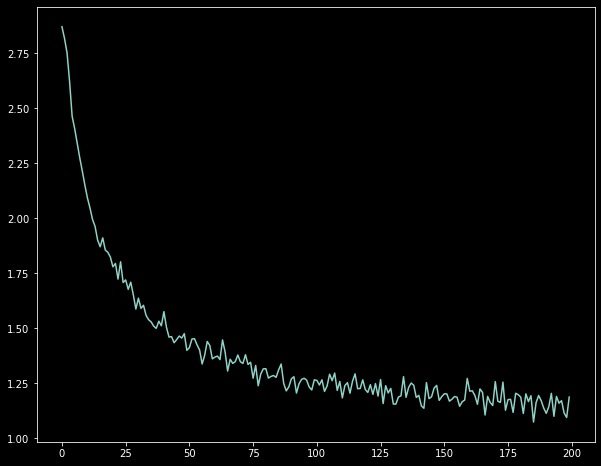

In [126]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.figure(figsize=(10, 8))
plt.plot(all_losses)
plt.show()

### Running on User Input

In [110]:
n_predictions = 3 # we want to see 3 top predictions

In [111]:
input_name = 'Batsakis' #Re-run for 'Amaya' and 'Bukoski'

In [123]:
names = ['Mahmoud' ,'Ayin' , 'Soori', 'Behnam', 'Vienna', 'Tina']

In [124]:
for input_name in names:
    print()
    with torch.no_grad():

            name_tensor = nameToTensor(input_name)

            hidden = rnn.initHidden()
            for i in range(name_tensor.size()[0]):
                output, hidden = rnn(name_tensor[i], hidden)

            topv, topi = output.topk(n_predictions, 1, True)

            for i in range(n_predictions):

                value = topv[0][i].item()
                language_index = topi[0][i].item()

                print(input_name, '(%.2f) %s' % (value, all_languages[language_index]))
                


Mahmoud (-0.11) Arabic
Mahmoud (-3.36) Irish
Mahmoud (-4.08) Japanese

Ayin (-0.71) Irish
Ayin (-1.19) Russian
Ayin (-2.81) French

Soori (-0.46) Italian
Soori (-2.22) Japanese
Soori (-2.37) Arabic

Behnam (-1.45) Arabic
Behnam (-1.59) English
Behnam (-1.89) German

Vienna (-1.11) Spanish
Vienna (-1.42) Italian
Vienna (-1.79) Czech

Tina (-0.05) Vietnamese
Tina (-3.12) Chinese
Tina (-6.08) Japanese
